Arthur: Amobichukwu Amanambu
Objective: Using environmental variables to predict vegetation dynamic (in form of Hurst exponent) with machine learning. The feature data include, Digital elevation model, rainfall, distance from road, distance from stream etc. Note the Hurst exponent was calculated using NDVI from about 30 years. with the Hurst exponent model. the Hurst exponent procedure was not shown here. However, this project tries to investigate how different machine learning models can best predict Hurst exponent and whether an ensemble model can do a better job. It appears that even simple model can predict better result than the stacked model in this project

# Machine learning compare

# Import initial needed library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the environmental dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\a.amanambu\Desktop\posting\data_new.csv")

# divide data by dependent and features (predictor) variables
X_features = dataset.iloc[:,4:15].values
y_dependent = dataset.iloc[:, -1].values


#show the first 5 samples
dataset.head(5)

,OID_,X,Y,Hurst,TWI,TPI300,TPI50,SPI,Slope,NS,DD,EW,Elv,pr,co,no2,o3,pm10,so2,Hurtz
0,39,93965.4461,3295461.117,0.658765,5.938030,2.100799,1.687004,0.000000,4.363049,-0.140835,0.317881,-0.990033,8,434.583333,246.166667,56.250000,303.916667,193.083333,131.833333,0
1,40,94387.2472,3295445.781,0.571676,8.177277,6.086994,4.996416,4.703273,2.327391,-0.393406,0.317414,-0.919365,12,434.583333,246.166667,56.250000,303.916667,193.083333,131.833333,0
2,44,96074.4400,3295384.595,0.599995,7.776092,4.100328,2.452830,4.214868,2.780289,0.974567,0.308773,-0.224095,10,436.250000,246.083333,56.333333,303.333333,193.083333,131.750000,0
3,46,96918.0291,3295354.098,0.645856,6.104195,6.105993,5.745223,0.000000,3.697116,-0.121272,0.290225,0.992619,12,437.416667,245.833333,56.333333,303.333333,193.083333,131.750000,0
4,74,89367.3706,3296767.165,0.585960,7.707360,0.507525,0.245173,4.514750,2.977758,-0.910175,0.193625,-0.414224,7,429.583333,246.750000,56.250000,305.000000,193.166667,132.000000,0


# Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_features, y_dependent, test_size = 0.25, random_state = 0)
print(X_train)

[[ 13.5307617 -12.168354  -14.0186119 ...  34.        420.9166667
  250.9166667]
 [  6.7952623  -4.3285103   0.7942657 ...  42.        412.1666667
  258.       ]
 [  8.5324831 -12.7477493   0.9043961 ...  77.        327.1666667
  269.0833333]
 ...
 [ 15.2237787 -28.8240509 -16.9965515 ... 148.        295.75
  280.3333333]
 [  8.8472557 -33.5129623  -8.3799896 ...  65.        287.9166667
  284.5833333]
 [  5.8950529   5.3778992  12.2637329 ... 307.        274.5833333
  420.75     ]]


# Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validate = sc.transform(X_validate)

# Create a function that will collect or stack all models for an esemble model

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

# define a stacking esemble model
def stacked_esemble():
    
    #collate the models to evaluate
    model_to_stack = list()
    model_to_stack.append(('NB', GaussianNB()))
    model_to_stack.append(('KS', SVC(kernel = 'rbf')))
    model_to_stack.append(('RF', RandomForestClassifier(n_estimators = 10, criterion = 'entropy')))
    model_to_stack.append(('KN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
    model_to_stack.append(('CT', DecisionTreeClassifier(criterion = 'entropy')))
    
    # define the most basic model that will learn the best way to combine all other models
    basic_model = GaussianNB()
    
    #create the the esemble model by stacking them
    esemble_model = StackingClassifier(model_to_stack, basic_model, cv = 5)
    return esemble_model

# Make a function a dictionary of all the classififers for model evaluation purpose

In [8]:
# define the list of models for predcition

def list_classifiers():
    classifiers = dict()
    classifiers['NB'] = GaussianNB()
    classifiers['KS'] = SVC(kernel = 'rbf')
    classifiers['RF'] = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    classifiers['KN'] = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifiers['CT'] = DecisionTreeClassifier(criterion = 'entropy')
    
    # define the stcking esemble models
    classifiers['EM'] = stacked_esemble()
    return classifiers

# function to evaluate models using K-fold Cross validation

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# accuracies = cross_val_score(classifier, X_train, y_train, cv = cv)
# print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
# print('standard deviation: {:.2f} %'.format(accuracies.std()*100))


def cross_evaluation(classifiers, X_train, y_train):
    accuracies = cross_val_score(classifier, X_train, y_train, cv = 5)
    return accuracies

# Retreive the models that we need to evaluate from the classifier function

In [ ]:
from numpy import mean, std
# retrieve the models itn an object
classifiers = list_classifiers()

#create an empy lsit where all the results will be imported into
output, classifier_names = list(), list()

# cross evalute the models with kfold cross validation
for classifier_name, classifier in classifiers.items():
    accuracies = cross_evaluation(classifier, X_train, y_train)
    output.append(accuracies)
    classifier_names.append(classifier_name)
    print('>%s %.3f (%.3f)' % (classifier_name, mean(accuracies), std(accuracies)))

>NB 0.790 (0.110)
>KS 0.907 (0.000)
>RF 0.906 (0.001)
>KN 0.900 (0.001)
>CT 0.836 (0.004)


# Make a Box plot to campare

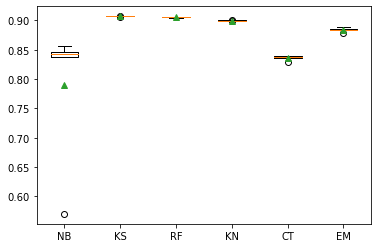

In [11]:
from matplotlib import pyplot
pyplot.boxplot(output, labels = classifier_names, showmeans = True)
pyplot.show()